In [149]:
import pandas as pd
from datetime import datetime

In [37]:
hosts = [f"br{str(i).zfill(2)}" for i in range(1,31)]
filepaths = [ f"backup/deploy_test/{host}.csv" for host in hosts]

In [261]:
def clean_and_addheader(filepath):
    new_lines=[]
    with open(filepath) as f:
        lines = f.readlines()
        started_time = float(lines[0].strip().split(",")[0])
        for line in lines:
            striped_words = line.strip().split(",")
            if len(striped_words) != 3:
                continue
            try:
                this_time = round(float(striped_words[0]),2) # 小数点第一位で四捨五入
            except:
                continue # 時間以外のものが混ざるなら殺す
            striped_words[0] = this_time
            striped_words[1] = int(striped_words[1])
            striped_words[2] = int(striped_words[2])
            new_lines.append(striped_words)
    return new_lines

In [262]:
hoge = clean_and_addheader(filepaths[10])

df = pd.DataFrame(hoge,columns=["time","jool","gobgp"])

In [298]:
dfs = []
# キレイにしてpandasに挿入
for index, filepath in enumerate(filepaths):
    host = hosts[index]
    df = pd.DataFrame(clean_and_addheader(filepath),columns=["time",f"{host}_jool",f"{host}_gobgp"])
    df.set_index("time")
    dfs.append(df)

merged = pd.concat(dfs,sort=True)    
merged["time"] = pd.to_datetime(merged['time'].astype(int), unit='s')
merged = merged.sort_values("time")
merged = merged.fillna(method='ffill')
merged = merged.reset_index(drop=True)
merged = merged.groupby('time').mean()

In [303]:
merged

,br01_gobgp,br01_jool,br02_gobgp,br02_jool,br03_gobgp,br03_jool,br04_gobgp,br04_jool,br05_gobgp,br05_jool,...,br26_gobgp,br26_jool,br27_gobgp,br27_jool,br28_gobgp,br28_jool,br29_gobgp,br29_jool,br30_gobgp,br30_jool
time,,,,,,,,,,,,,,,,,,,,,
2019-12-30 18:56:06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30 18:56:07,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30 18:56:08,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30 18:56:09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30 18:56:10,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 19:18:50,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
2019-12-30 19:18:51,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
2019-12-30 19:18:52,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0


In [299]:
merged.to_csv("hoge.csv")

In [305]:
coluｍns_j = [f"{host}_jool" for host in hosts ]
coluｍns_b = [f"{host}_gobgp" for host in hosts ]

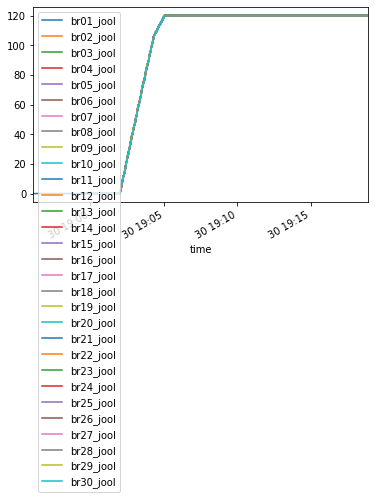

In [306]:
merged[columns_j].plot()